In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mne as mne
import os.path as op
%matplotlib inline

In [19]:
#read data
raw = mne.io.read_raw_fif('/home/despoB/kaihwang/Clock/10772/MEG/10772_clock_run6_dn_ds_sss_raw.fif')


Opening raw data file /home/despoB/kaihwang/Clock/10772/MEG/10772_clock_run6_dn_ds_sss_raw.fif...
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Current compensation grade : 0


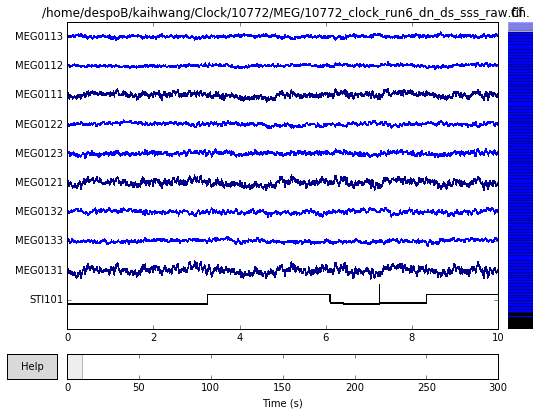

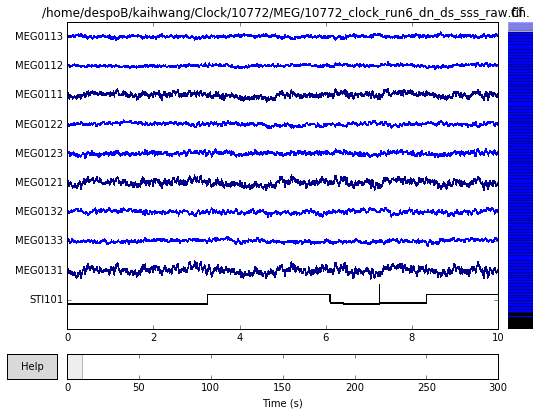

In [20]:
## examine raw
order = np.arange(raw.info['nchan'])
order[9] = 310  # We exchange the plotting order of two channels
order[310] = 9  # to show the trigger channel as the 10th channel.
raw.plot(n_channels=10, order=order, block=True)

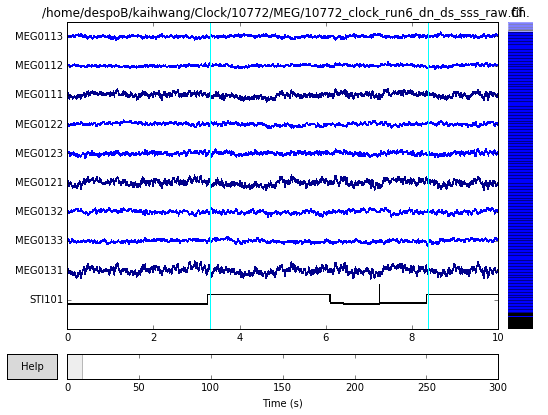

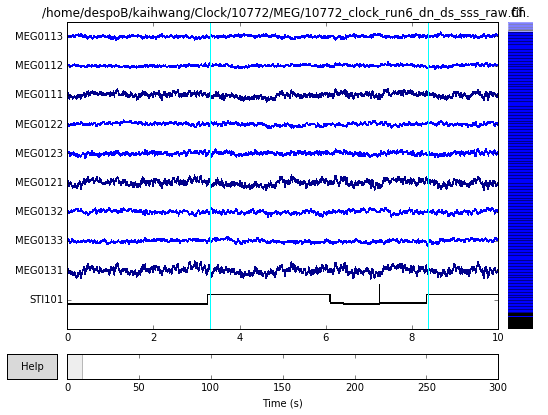

In [13]:
events = mne.read_events('/home/despoB/kaihwang/Clock/10772/MEG/MEG_10772_20140509_6_clock_ds4.eve')
raw.plot(events=events, n_channels=10, order=order)

In [9]:
events

array([[    0,     0,     0],
       [  829,     0,   110],
       [ 2095,     0,   110],
       [ 3528,     0,   110],
       [ 4499,     0,   110],
       [ 5773,     0,   110],
       [ 7135,     0,   110],
       [ 8139,     0,   110],
       [ 9555,     0,   110],
       [10871,     0,   110],
       [12258,     0,   110],
       [13570,     0,   110],
       [14887,     0,   110],
       [15957,     0,   110],
       [16848,     0,   110],
       [18373,     0,   110],
       [19797,     0,   110],
       [20810,     0,   110],
       [21951,     0,   110],
       [23205,     0,   110],
       [24379,     0,   110],
       [25366,     0,   110],
       [26666,     0,   110],
       [27740,     0,   110],
       [28815,     0,   110],
       [30169,     0,   110],
       [31356,     0,   110],
       [32518,     0,   110],
       [33389,     0,   110],
       [34680,     0,   110],
       [35771,     0,   110],
       [36833,     0,   110],
       [38162,     0,   110],
       [39

63 matching events found
0 projection items activated
Loading data for 63 events and 176 original time points ...
0 bad epochs dropped
Loading data for 20 events and 176 original time points ...


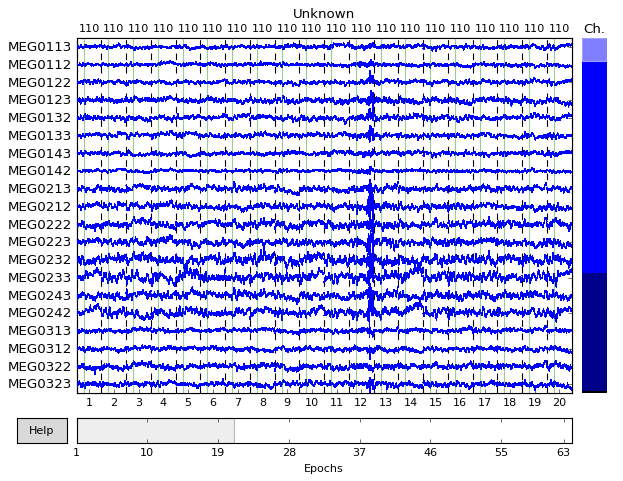

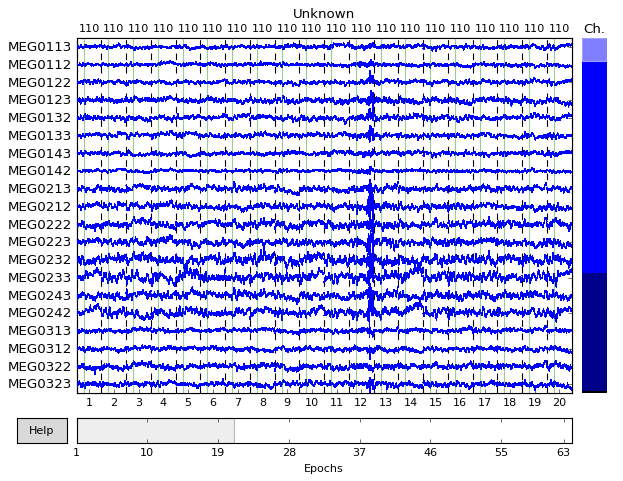

In [22]:
## epoch
tmin, tmax = -0.2, 0.5
event_id = {'Clock': 110}
# Only pick MEG and EOG channels.
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True)

baseline = (None, 0.0)
reject = {'mag': 4e-11, 'eog': 200e-5}
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, reject=reject, picks=picks)
epochs.plot(block=True)

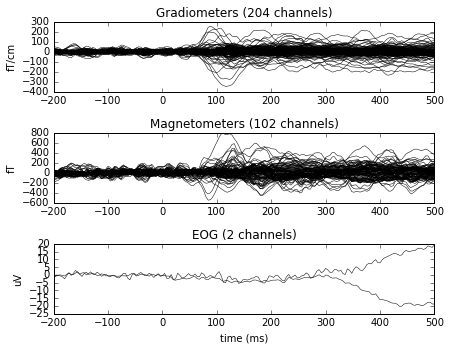

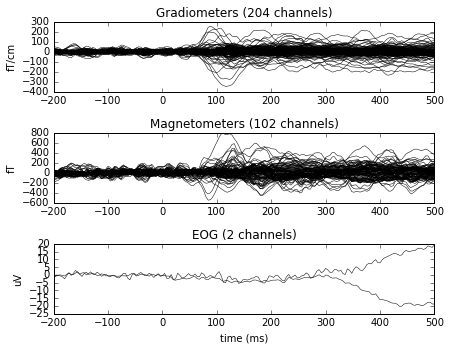

In [23]:
##average
picks = mne.pick_types(epochs.info, meg=True, eog=True)
evoked_clock = epochs['Clock'].average(picks=picks)
evoked_clock.plot() 

Loading data for 63 events and 176 original time points ...
Loading data for 63 events and 176 original time points ...


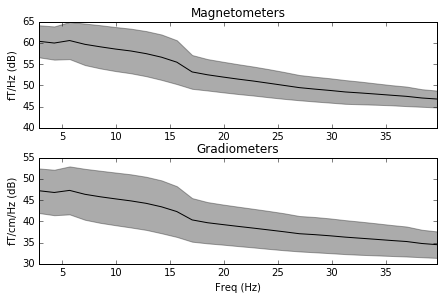

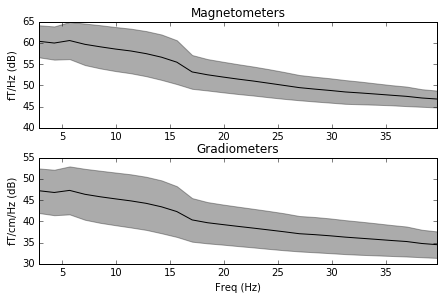

In [25]:
#TFR
epochs.plot_psd(fmin=2., fmax=40.)


Loading data for 63 events and 176 original time points ...


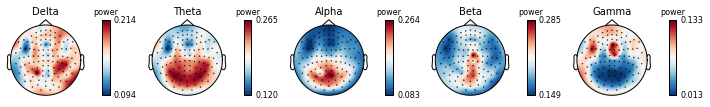

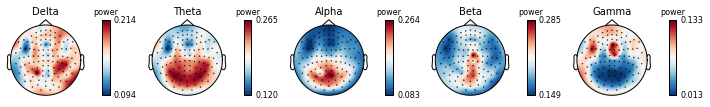

In [26]:
epochs.plot_psd_topomap(ch_type='grad', normalize=True)